# Metadata

Class: DS5100

Date: May 2023

Student Name: Michael Macfarlan

Student ID: zxr5fv

This URL: https://github.com/mdmacfar/montecarlosimulator/blob/main/montecarlo_demo.ipynb

Github Repo URL: https://github.com/mdmacfar/montecarlosimulator


# Testing Scenarios

In [67]:
from mcs_pkg.montecarlo import Die, Game, Analyzer

## Scenario 1: A 2-headed coin

For each game, we will use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts. Compute relative frequency as the number of jackpots over the total number of rolls. Show your results, comparing the two relative frequencies, in a simple bar chart.

In [68]:
# Setup: A fair coin (with faces H and T) and one unfair coin, 
# in which one of the faces has a weight of 5 and the others 1.
fair_coin = Die(['H', 'T'])
unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5)

# Here's a game of 1000 flips with all fair coins.
fairgame = Game([fair_coin, fair_coin])
fairgame.play(1000)
fairgame_analyzer = Analyzer(fairgame)
fairgame_jackpot = fairgame_analyzer.count_jackpots()
fairgame_flips = fairgame.results.shape[0]
fairgame_jackpot
fairgame_flips
fairgame_freq = fairgame_jackpot / fairgame_flips
fairgame_freq


,count
no_jackpot,0.474
jackpot,0.526


In [69]:
fairgame.show()

    die_1 die_2
0       T     H
1       H     T
2       H     H
3       H     H
4       H     H
..    ...   ...
995     T     T
996     H     H
997     T     T
998     H     H
999     H     H

[1000 rows x 2 columns]


In [70]:
# A game of 1000 flips with two unfair dice and one fair die.
fairunfair = Game([fair_coin, unfair_coin, unfair_coin])
fairunfair.play(1000)
fairunfair_analyzer = Analyzer(fairunfair)
fairunfair_jackpot = fairunfair_analyzer.count_jackpots()
fairunfair_flips = fairunfair.results.shape[0]
fairunfair_freq = fairunfair_jackpot / fairunfair_flips
fairunfair_freq


,count
no_jackpot,0.672
jackpot,0.328


In [71]:
fairunfair.show()

    die_1 die_2 die_3
0       T     H     H
1       H     H     H
2       H     H     H
3       T     H     H
4       T     H     H
..    ...   ...   ...
995     T     H     H
996     H     T     T
997     H     H     H
998     H     H     H
999     H     H     H

[1000 rows x 3 columns]


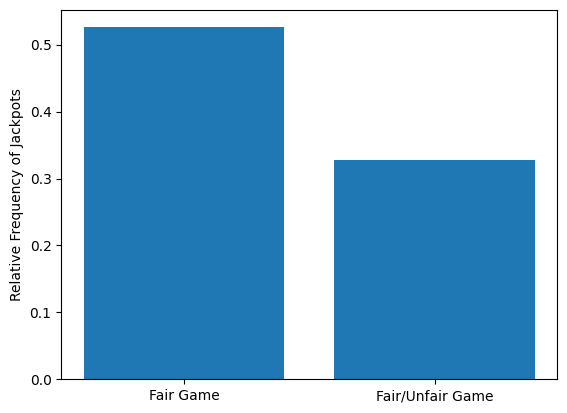

In [72]:
import matplotlib.pyplot as plt

fairgame_freq_value = fairgame_freq.iloc[1,0]
fairunfair_freq_value = fairunfair_freq.iloc[1,0]

labels = ['Fair Game', 'Fair/Unfair Game']
values = [fairgame_freq_value, fairunfair_freq_value]
plt.bar(labels, values)
plt.ylabel('Relative Frequency of Jackpots')
plt.show()

## Scenario 2: A 6-sided die

For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

In [73]:
# Setup: A fair die and two unfair dice, all of six sides with the
# faces 1 through 6. One unfair die (Type 1) will weight 6 five
# times more than the others (i.e. it has weight of 5 and the
# others a weight of 1 each). The other unfair die (Type 2)
# will weight 1 five times more than the others.

fair_die = Die([1,2,3,4,5,6])
unfair_die1 = Die([1,2,3,4,5,6])
unfair_die1.change_weight(6, 5)
unfair_die2 = Die([1,2,3,4,5,6])
unfair_die2.change_weight(1, 5)

# Game 1: 10,000 rolls with five fair dice.
game1 = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
game1.play(10000)
game1_analyzer = Analyzer(game1)
game1_jackpot = game1_analyzer.count_jackpots()
game1_flips = game1.results.shape[0]
game1_freq = game1_jackpot / game1_flips
game1_freq




,count
no_jackpot,0.9991
jackpot,0.0009


In [74]:
game1.show()

      die_1  die_2  die_3  die_4  die_5
0         1      3      3      4      4
1         6      5      3      5      1
2         2      3      1      6      3
3         4      5      6      6      5
4         1      2      2      6      6
...     ...    ...    ...    ...    ...
9995      3      2      6      1      1
9996      2      6      5      5      1
9997      4      3      2      3      6
9998      2      1      3      3      1
9999      5      3      4      4      6

[10000 rows x 5 columns]


In [75]:
# Game 2: 10,000 rolls with 2 unfair dice of type 1, 1 unfair dice of type 2, and the rest fair dice.
game2 = Game([unfair_die1, unfair_die1, unfair_die2, fair_die, fair_die])
game2.play(10000)
game2_analyzer = Analyzer(game2)
game2_jackpot = game2_analyzer.count_jackpots()
game2_flips = game2.results.shape[0]
game2_freq = game2_jackpot / game2_flips
game2_freq

,count
no_jackpot,0.9984
jackpot,0.0016


In [76]:
game2.show()

      die_1  die_2  die_3  die_4  die_5
0         2      2      5      4      5
1         5      6      1      3      4
2         1      3      2      6      3
3         2      3      1      6      6
4         5      6      5      3      2
...     ...    ...    ...    ...    ...
9995      6      3      1      5      2
9996      6      4      3      1      5
9997      1      1      1      3      6
9998      2      3      6      5      1
9999      6      6      6      4      6

[10000 rows x 5 columns]


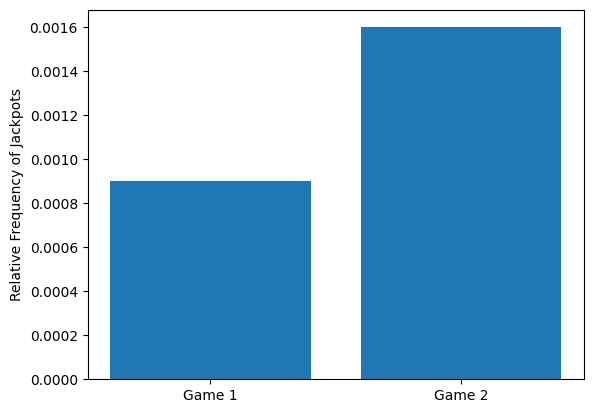

In [77]:
game1_freq_value = game1_freq.iloc[1,0]
game2_freq_value = game2_freq.iloc[1,0]

labels = ['Game 1', 'Game 2']
values = [game1_freq_value, game2_freq_value]
plt.bar(labels, values)
plt.ylabel('Relative Frequency of Jackpots')
plt.show()

## Scendario 3: Letters of the Roman Alphabet

In [78]:
#Create the alphabet dice
alpha_die = Die(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
alpha_die.change_weight('A', 8.4966)
alpha_die.change_weight('B', 2.0720)
alpha_die.change_weight('C', 4.5388)
alpha_die.change_weight('D', 3.3844)
alpha_die.change_weight('E', 11.1607)
alpha_die.change_weight('F', 1.8121)
alpha_die.change_weight('G', 2.4705)
alpha_die.change_weight('H', 3.0034)
alpha_die.change_weight('I', 7.5448)
alpha_die.change_weight('J', 0.1965)
alpha_die.change_weight('K', 1.1016)
alpha_die.change_weight('L', 5.4893)
alpha_die.change_weight('M', 3.0129)
alpha_die.change_weight('N', 6.6544)
alpha_die.change_weight('O', 7.1635)
alpha_die.change_weight('P', 3.1671)
alpha_die.change_weight('Q', 0.1962)
alpha_die.change_weight('R', 7.5809)
alpha_die.change_weight('S', 5.7351)
alpha_die.change_weight('T', 6.9509)
alpha_die.change_weight('U', 3.6308)
alpha_die.change_weight('V', 1.0074)
alpha_die.change_weight('W', 1.2899)
alpha_die.change_weight('X', 0.2902)
alpha_die.change_weight('Y', 1.7779)
alpha_die.change_weight('Z', 0.2722)

# Play a game with 5 alphabet dice and roll them 1000 times
alpha_game = Game([alpha_die, alpha_die, alpha_die, alpha_die, alpha_die])
alpha_game.play(1000)
alpha_game_analyzer = Analyzer(alpha_game)
alpha_game.show()



    die_1 die_2 die_3 die_4 die_5
0       A     L     L     R     E
1       S     S     N     I     R
2       S     F     L     G     I
3       B     A     H     Y     O
4       U     E     W     A     O
..    ...   ...   ...   ...   ...
995     E     I     D     I     E
996     D     N     T     R     A
997     L     S     L     T     R
998     E     N     L     M     M
999     L     N     N     R     P

[1000 rows x 5 columns]


In [79]:
# View results df in Data Viewer
df = alpha_game.results

To see the df results in VSCode, open a new terminal (Terminal > New Terminal) and click on the "Jupyter" tab. Then click the box with the arrow coming out of it to the left of the variable "df". This will open the dataframe in Data Viewer.

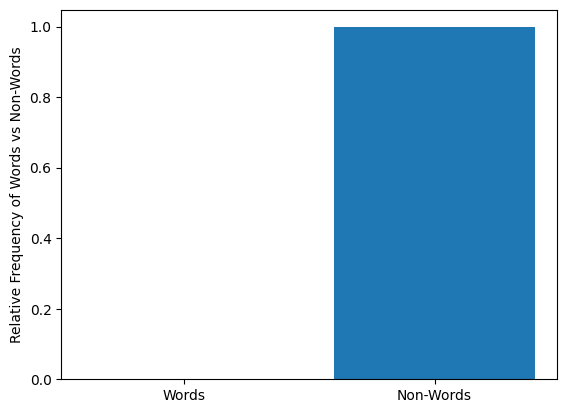

In [80]:
# Number of words (or close enough to words) and non-words found in results
words = 2 #<-- Put the number of words you find that have been randomly generated here
nonwords = 1000 - words

# Calculate relative frequency of words vs the rest of the results
words / nonwords

freq_words = words / (words + nonwords)
freq_nonwords = nonwords / (words + nonwords)

labels = ['Words', 'Non-Words']
values = [freq_words, freq_nonwords]
plt.bar(labels, values)
plt.ylabel('Relative Frequency of Words vs Non-Words')
plt.show()

# Directory Listing

In [81]:
!ls -lRF -o

.:
total 116
-rw-r--r-- 1 vscode  1074 Apr 30 16:38 LICENSE
drwxr-xr-x 2 vscode  4096 Apr 30 16:41 Monte_Carlo_Simulator.egg-info/
-rw-r--r-- 1 vscode  4590 Apr 30 19:59 README.md
-rw-r--r-- 1 vscode   228 Apr 30 16:38 compose-dev.yaml
drwxr-xr-x 3 vscode  4096 Apr 30 16:38 mcs_pkg/
-rw-r--r-- 1 vscode 74021 Apr 30 16:38 montecarlo_demo.ipynb
-rw-r--r-- 1 vscode   109 Apr 30 18:11 montecarlo_tests_results.txt
-rw-r--r-- 1 vscode   608 May  1 00:50 scratch.py
-rw-r--r-- 1 vscode   372 Apr 30 16:38 setup.py
drwxr-xr-x 3 vscode  4096 Apr 30 18:28 tests/

./Monte_Carlo_Simulator.egg-info:
total 20
-rw-r--r-- 1 vscode 306 Apr 30 16:41 PKG-INFO
-rw-r--r-- 1 vscode 320 Apr 30 16:41 SOURCES.txt
-rw-r--r-- 1 vscode   1 Apr 30 16:41 dependency_links.txt
-rw-r--r-- 1 vscode   7 Apr 30 16:41 requires.txt
-rw-r--r-- 1 vscode  14 Apr 30 16:41 top_level.txt

./mcs_pkg:
total 16
-rw-r--r-- 1 vscode  118 Apr 30 16:38 __init__.py
drwxr-xr-x 2 vscode 4096 May  1 00:37 __pycache__/
-rw-r--r-- 1 vscode 643

# Installation Output Listing

In [82]:
# Make sure you're in the correct directory (same as "setup.py" file)
%cd com.docker.devenvironments.code/

[Errno 2] No such file or directory: 'com.docker.devenvironments.code/'
/com.docker.devenvironments.code


In [83]:
# Check working directory
%pwd

'/com.docker.devenvironments.code'

In [59]:
# Install package
%pip install .

Processing /com.docker.devenvironments.code
  Created wheel for Monte-Carlo-Simulator: filename=Monte_Carlo_Simulator-1.0.0-py3-none-any.whl size=5481 sha256=26b49ac1d5686668b97317e2542ca7093420371f2eeca817e340d80d9336bbb9
  Stored in directory: /tmp/pip-ephem-wheel-cache-1_gg9gjy/wheels/06/8d/4a/710b6c3e6d7df965a43aa3d9432bf448989baa2e26c341bd12
Successfully built Monte-Carlo-Simulator
  Attempting uninstall: Monte-Carlo-Simulator
    Found existing installation: Monte-Carlo-Simulator 1.0.0
    Uninstalling Monte-Carlo-Simulator-1.0.0:
      Successfully uninstalled Monte-Carlo-Simulator-1.0.0
Note: you may need to restart the kernel to use updated packages.
